# Model Evaluation and Refinement

In [17]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('20230101_automobile_wrangling.csv', index_col = [0])

In [13]:
df_n = df.select_dtypes(include = np.number)

In [14]:
df_n.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100Km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111.0,5000.0,21,8.703704,13495.0,11.190476,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,111.0,5000.0,21,8.703704,16500.0,11.190476,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,154.0,5000.0,19,9.038462,16500.0,12.368421,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,102.0,5500.0,24,7.833333,13950.0,9.791667,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,115.0,5500.0,18,10.681818,17450.0,13.055556,0,1,1,0


In [18]:
from ipywidgets import interact, interactive, fixed, interact_manual

## Training and Testing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
xdata = df_n.drop('price', axis = 1)
ydata = df_n['price']

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.10, random_state = 1)

In [30]:
xtrain.shape, xtest.shape

((180, 20), (21, 20))

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(xtrain[['horsepower']], ytrain)

LinearRegression()

In [34]:
#R-squared coefficient of determination on train
lm.score(xtrain[['horsepower']],ytrain)

0.6621588065210514

In [35]:
# On Test data
lm.score(xtest[['horsepower']],ytest)

0.3634554596325088

### Cross-Validation Score

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [65]:
Rcross = cross_val_score(lm, xdata[['horsepower']], ydata, cv = 4)

In [66]:
Rcross

array([0.7747254 , 0.51722436, 0.74881624, 0.04792707])

In [67]:
Rcross.mean(), Rcross.std()

(0.5221732664777984, 0.2915834197302016)

In [75]:
yhat = cross_val_predict(lm,xdata[['horsepower']],ydata,cv=4)
yhat[0:4]

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ])

In [72]:
yhat.shape

(201,)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [78]:
mean_squared_error(ydata,yhat)

23495641.533768877

In [82]:
r2_score(ydata,yhat)

0.6261135791029059

### Overfitting Underfitting

In [84]:
# Overfitting common in MLR and Polynomial Regression

In [85]:
lr  = LinearRegression()
lr.fit(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']], ytrain) 

LinearRegression()

In [86]:
yhat_train = lr.predict(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km']])
yhat_test =  lr.predict(xtest[['horsepower','curb-weight','engine-size','highway-L/100km']])

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.histplot(RedFunction,kde = True, color="r", label=RedName)
    ax2 = sns.histplot(BlueFunction,kde = True, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

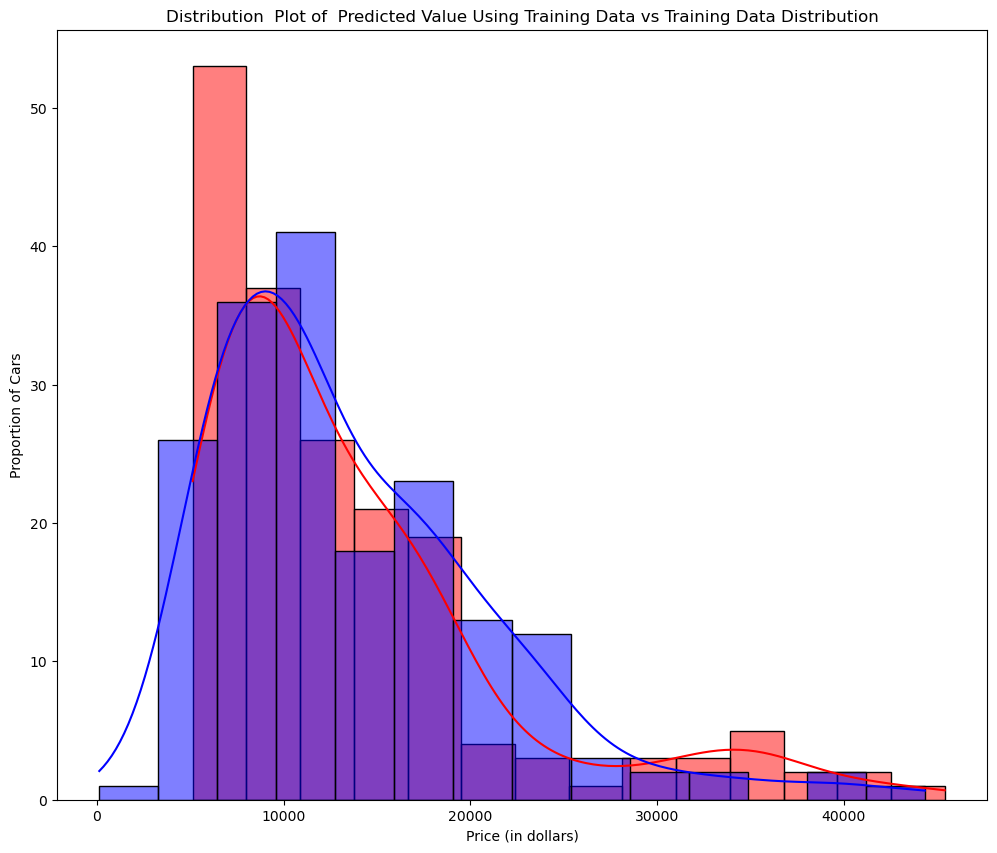

In [103]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(ytrain, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

<AxesSubplot:xlabel='price', ylabel='Density'>

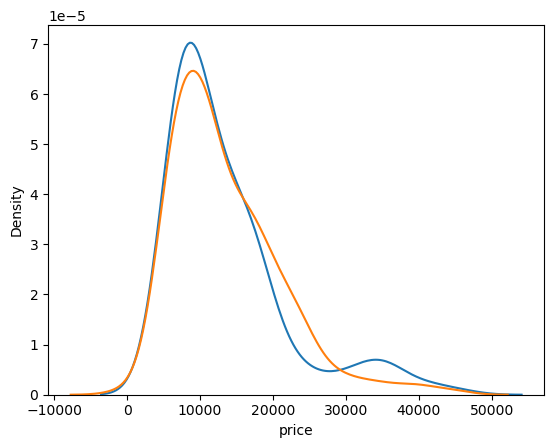

In [106]:
sns.kdeplot(data=ytrain)
sns.kdeplot(data=yhat_train)

<AxesSubplot:xlabel='price', ylabel='Density'>

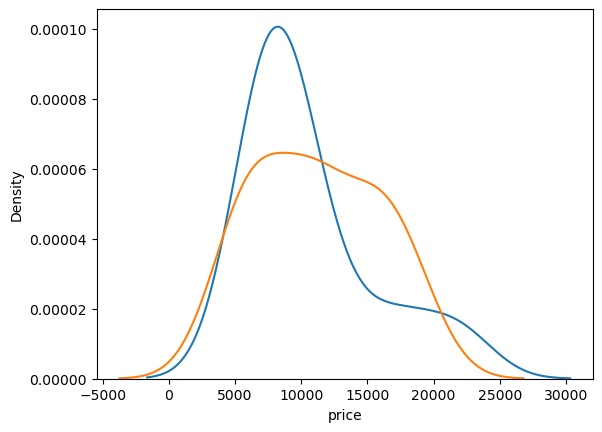

In [107]:
sns.kdeplot(data=ytest)
sns.kdeplot(data=yhat_test)

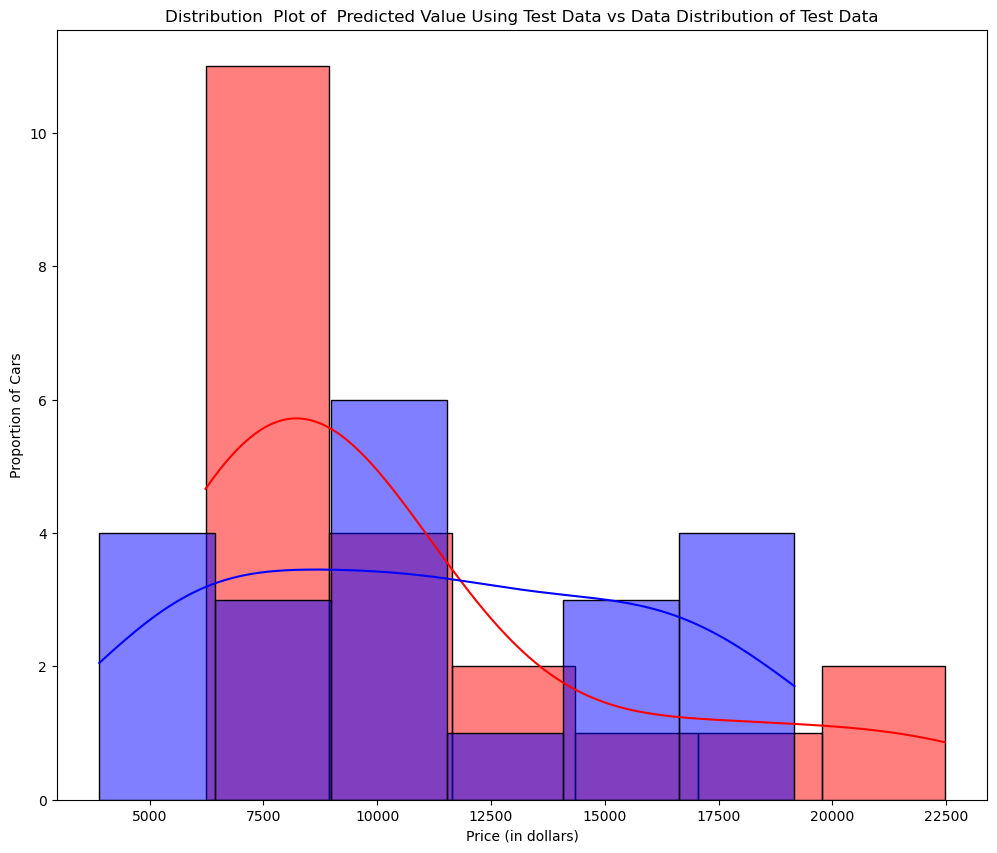

In [109]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [110]:
# Overfitting in Polynomial

In [112]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
xtrainp, xtestp, ytrainp, ytestp = train_test_split(xdata, ydata, test_size=0.45, random_state=0)

In [114]:
pr = PolynomialFeatures(degree=5)
xtrainp = pr.fit_transform(xtrainp[['horsepower']]) 
xtestp = pr.fit_transform(xtestp[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [115]:
poly  = LinearRegression()

In [116]:
poly.fit(xtrainp,ytrainp)

LinearRegression()

In [117]:
yhat = poly.predict(xtestp)

In [119]:
ytestp[0:4].values, yhat[0:4]

(array([ 6295., 10698., 13860., 13499.]),
 array([ 6724.76110713,  7303.49858854, 12213.80179226, 18899.2071197 ]))

In [122]:
print(poly.score(xtrainp,ytrainp))
print(poly.score(xtestp,ytestp))

0.5570463603801643
-29.694900137100348


In [124]:
r2_score(ytestp,yhat)

-29.694900137100348

In [147]:
xtrainp[]

array([[1.00000000e+00, 1.01000000e+02, 1.02010000e+04, 1.03030100e+06,
        1.04060401e+08, 1.05101005e+10],
       [1.00000000e+00, 1.62000000e+02, 2.62440000e+04, 4.25152800e+06,
        6.88747536e+08, 1.11577101e+11],
       [1.00000000e+00, 6.80000000e+01, 4.62400000e+03, 3.14432000e+05,
        2.13813760e+07, 1.45393357e+09],
       [1.00000000e+00, 1.60000000e+02, 2.56000000e+04, 4.09600000e+06,
        6.55360000e+08, 1.04857600e+11],
       [1.00000000e+00, 5.20000000e+01, 2.70400000e+03, 1.40608000e+05,
        7.31161600e+06, 3.80204032e+08],
       [1.00000000e+00, 1.61000000e+02, 2.59210000e+04, 4.17328100e+06,
        6.71898241e+08, 1.08175617e+11],
       [1.00000000e+00, 1.03396985e+02, 1.06909365e+04, 1.10541060e+06,
        1.14296123e+08, 1.18178745e+10],
       [1.00000000e+00, 6.90000000e+01, 4.76100000e+03, 3.28509000e+05,
        2.26671210e+07, 1.56403135e+09],
       [1.00000000e+00, 9.70000000e+01, 9.40900000e+03, 9.12673000e+05,
        8.85292810e+07, 

In [145]:
xdata.iloc[:,11]

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
196    114.0
197    160.0
198    134.0
199    106.0
200    114.0
Name: horsepower, Length: 201, dtype: float64

In [168]:
def PollyPlot( y_predict, y_actual, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    plt.plot( y_predict, 'ro', label='Predict Data')
    plt.plot( y_actual, 'go', label='Actual Data')
    plt.ylabel('Price')
    plt.ylim(0,100000)
    plt.legend()

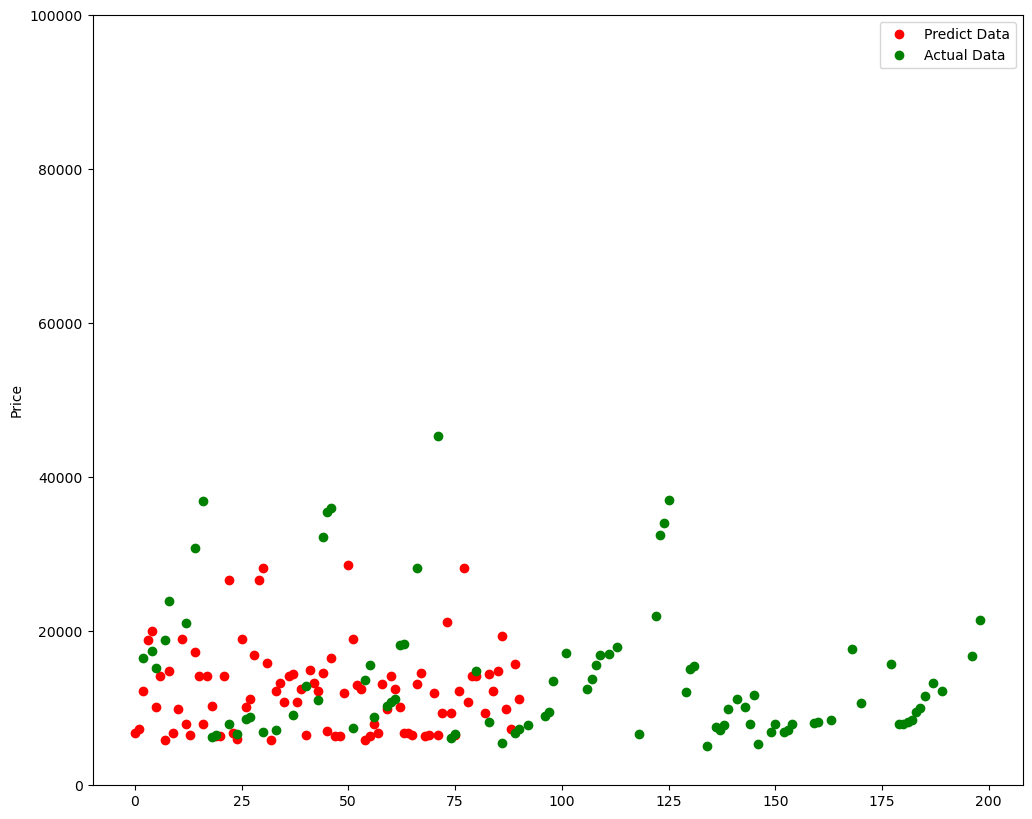

In [169]:
PollyPlot(yhat, ytestp, poly,pr)

(0.0, 200000.0)

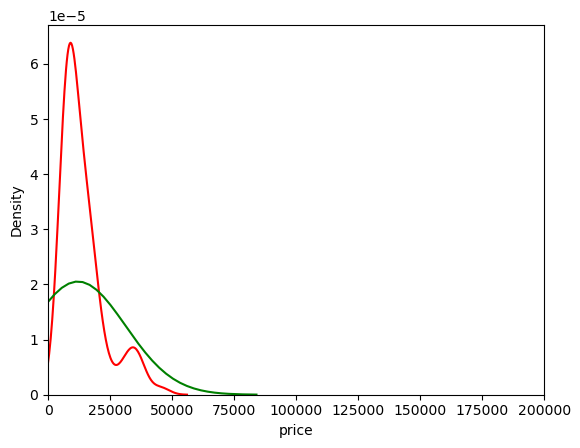

In [170]:
sns.kdeplot(ytestp, color = 'r')
sns.kdeplot(yhat, color = 'g')
plt.xlim(0, 200000)

In [174]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(xtrain[['horsepower']])
    
    x_test_pr = pr.fit_transform(xtest[['horsepower']])    
    
    lr.fit(x_train_pr, ytrain)
    
    Rsqu_test.append(lr.score(x_test_pr, ytest))



In [176]:
Rsqu_test

[0.3634554596325089,
 0.3721807862386536,
 0.3586755513345974,
 0.3663790550361653]

Text(0.5, 1.0, 'R^2 Using Test Data')

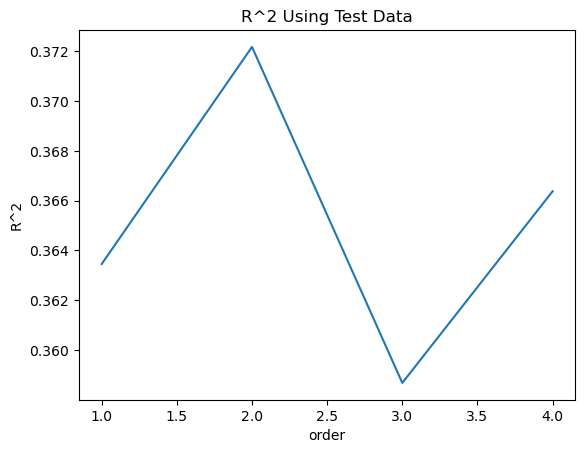

In [185]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ')    

In [186]:
# Interact function

In [199]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(xdata[['horsepower']], ydata, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    yhat = poly.predict(x_test)
  #  PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
    PollyPlot(yhat,y_test, poly, pr)

In [200]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [ ]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_train_pr1.shape #there are now 15 features
poly1=LinearRegression().fit(x_train_pr1,y_train)
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)




### Ridge Regression

In [201]:
from sklearn.linear_model import Ridge

In [202]:
pr= PolynomialFeatures(degree=2)
xtrainrr = pr.fit_transform(xtrain[['horsepower','curb-weight','engine-size','highway-L/100km','normalized-losses','symboling']])
xtestrr =  pr.fit_transform(xtest[['horsepower','curb-weight','engine-size','highway-L/100km','normalized-losses','symboling']])


In [203]:
rm = Ridge(alpha=1)  # alpha = Regularization parameter

In [204]:
rm.fit(xtrainrr,ytrain)

Ridge(alpha=1)

In [205]:
yhat_rr = rm.predict(xtestrr)

In [207]:
yhat_rr[0:4], ytest[0:4].values

(array([10107.98809585,  7278.45898391, 10210.50854009,  5412.18759131]),
 array([ 9549.,  6229., 10245.,  7295.]))

### Grid Search

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
parameters = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

In [210]:
RR = Ridge()

In [217]:
Grid = GridSearchCV(RR,parameters,cv=4) #idd = None not recognized

In [218]:
Grid.fit(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], ydata)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [219]:
bestRR = Grid.best_estimator_

In [220]:
bestRR

Ridge(alpha=10000)

In [221]:
bestRR.score(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], ydata)

0.8087836116843425

In [225]:
parameters2 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000,1000000],'normalize':[True,False]}]

In [226]:
Grid2 = GridSearchCV(Ridge(),parameters2,cv = 4)

In [227]:
Grid2.fit(xdata[['horsepower','curb-weight','engine-size','highway-L/100km']],ydata)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000],
                          'normalize': [True, False]}])

In [228]:
Grid2.best_estimator_

Ridge(alpha=1, normalize=True)

In [229]:
bestRR2 = Grid2.best_estimator_

In [232]:
bestRR2.score(xtest[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], ytest)

0.6210586721872956

#### Thank You